### Clustering is done by minimizing the sum of distances between each object and the centroid of its group or cluster. Quadratic distance is often used. The algorithm consists of three steps:

1. **Initialization**: once the number of groups, k, has been chosen, k centroids are established in the data space, for example, choosing them randomly.
2. **Assign objects to centroids**: each data object is assigned to its nearest centroid.
3. **Centroid update**: the position of the centroid of each group is updated, taking as the new centroid the position of the average of the objects belonging to said group.

Steps 2 and 3 are repeated until the centroids do not move, or move below a threshold distance at each step.

### Clustering of stocks by return and volatility

We analyze the S&P 500 index to cluster stocks based on return and volatility. This index comprises 500 large-cap US companies from various sectors, traded on NYSE or Nasdaq. Due to its representation of the US’s largest publicly traded firms, it serves as a suitable dataset for algorithmic k-means clustering.


In [1]:
#Import the libraries that we are going to need to carry out the analysis:
import numpy as np 
import pandas as pd
import pandas_datareader as dr
import yfinance as yf

from pylab import plot,show
from matplotlib import pyplot as plt
import plotly.express as px

from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans 
from sklearn import preprocessing

### Load Data
We calculate the annual average return and volatility for each company by obtaining their adjusted closing prices during 01/02/2020–12/02/2022 and inserting them into a dataframe, which is then annualized (assuming 252 market days per year).

In [2]:
# Define the url
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read in the url and scrape ticker data
data_table = pd.read_html(sp500_url)
tickers = data_table[0]['Symbol'].values.tolist()
tickers = [s.replace('\n', '') for s in tickers]
tickers = [s.replace('.', '-') for s in tickers]
tickers = [s.replace(' ', '') for s in tickers]


In [ ]:
# # Download prices
# prices_list = []
# for ticker in tickers:
#     try:
#         prices = dr.DataReader(ticker,'yahoo','01/01/2020')['Adj Close']
#         prices = pd.DataFrame(prices)
#         prices.columns = [ticker]
#         prices_list.append(prices)
#     except:
#         pass
#     prices_df = pd.concat(prices_list,axis=1)
# prices_df.sort_index(inplace=True)

# # Create an empity dataframe
# returns = pd.DataFrame()

# # Define the column Returns
# returns['Returns'] = prices_df.pct_change().mean() * 252

# # Define the column Volatility
# returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)

# Download prices
prices_list = []
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker, 'yahoo', '01/01/2020')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass

if prices_list:
    prices_df = pd.concat(prices_list, axis=1)
    prices_df.sort_index(inplace=True)

    # Create an empty dataframe
    returns = pd.DataFrame()

    # Define the column Returns
    returns['Returns'] = prices_df.pct_change().mean() * 252

    # Define the column Volatility
    returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
else:
    print("No data fetched for the given tickers.")
    

### Determine the optimal number of clusters
The Elbow curve method is a technique used to determine the optimal number of clusters for K-means clustering. The method works by plotting the sum of squared errors (SSE) for different values of k (number of clusters). The optimal number of clusters is the value of k at which the SSE starts to decrease at a slower rate. The optimal number of clusters is determined by finding the elbow or the point at which the SSE reaches its minimum value. In this case, the optimal number of clusters is 4.

In [4]:
# Format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))

plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

NameError: name 'returns' is not defined

### K-means clustering
Once the optimum number of clusters has been defined, we proceed to create them. In the first instance, the centroids are defined using the sklearn library. For the creation of 4 groups of actions, the K-means algorithm iteratively assigns data points to the groups based on their similarity of characteristics, or “features”, in this case, Average Annualized Return and Average Annualized Volatility.

In [ ]:
# Computing K-Means with K = 4 (4 clusters)
centroids,_ = kmeans(data,4)

# Assign each sample to a cluster
idx,_ = vq(data,centroids)

# Create a dataframe with the tickers and the clusters that's belong to
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details_df = pd.DataFrame(details)

# Rename columns
details_df.columns = ['Ticker','Cluster']

# Create another dataframe with the tickers and data from each stock
clusters_df = returns.reset_index()

# Bring the clusters information from the dataframe 'details_df'
clusters_df['Cluster'] = details_df['Cluster']

# Rename columns
clusters_df.columns = ['Ticker', 'Returns', 'Volatility', 'Cluster']

 The algorithm initially randomly assigns the data points to the clusters and then calculates the centroid of each cluster, which is the mean of all the data points within the cluster. Then, it compares the data points to the centroid and reassigns them to groups accordingly. This process is repeated until the centroid of each cluster remains relatively stable, at which point the algorithm stops and each cluster is assigned a label. The end result is a set of 4 groups, each containing stocks that have similar returns and volatility.

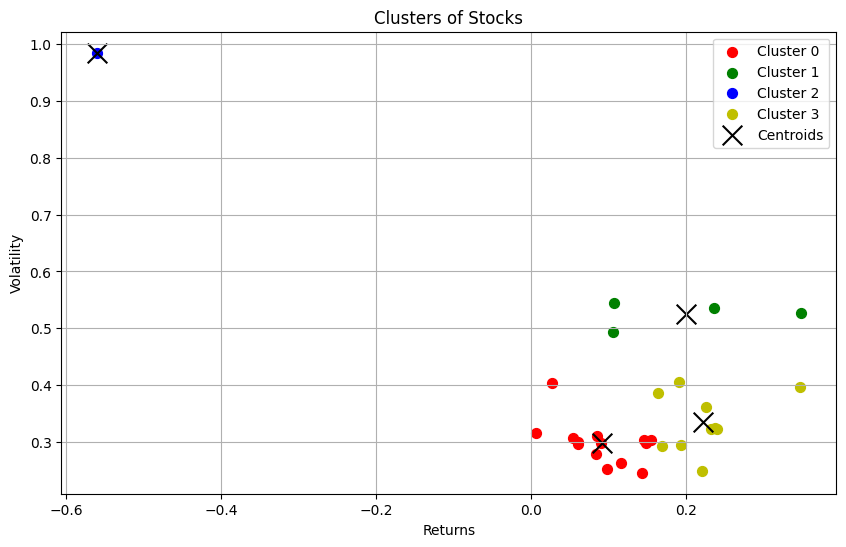

In [ ]:
# Plot the clusters created using Matplotlib
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']
for i in range(4):
    points = data[np.where(idx == i)]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='k', label='Centroids')
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.title('Clusters of Stocks')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Outlier treatment
When creating the clusters, four outliers or outliers are detected in a scatter plot. Outliers are data points that are significantly different from the rest of the data points in the data set. Often, they can lead to inaccurate results when using an algorithm, since they don’t fit the same pattern as the other data points. Therefore, it is important to segregate and remove outliers to improve the accuracy of the model.

Outlier removal can help the algorithm focus on the most representative data points and reduce the effect of outliers on the results. This can help increase the accuracy of the model and ensure that the data points are grouped correctly. The removed tickers are:

- MRNA
- ENPH
- TSLA
- CEG

In [ ]:

# Identify and remove the outliers stocks
outliers = ['MRNA', 'ENPH', 'TSLA', 'CEG']
for outlier in outliers:
    if outlier in returns.index:
        returns.drop(outlier, inplace=True)

# Recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']), np.asarray(returns['Volatility'])]).T

Once the outliers have been eliminated, we repeat the steps performed for clustering using the K-means algorithm to obtain more accurate clusters.

In [ ]:
# Computing K-Means with K = 4 (4 clusters)
centroids,_ = kmeans(data,4)

# Assign each sample to a cluster
idx,_ = vq(data,centroids)

# Create a dataframe with the tickers and the clusters that's belong to
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details_df = pd.DataFrame(details)

# Rename columns
details_df.columns = ['Ticker','Cluster']

# Create another dataframe with the tickers and data from each stock
clusters_df = returns.reset_index()

# Bring the clusters information from the dataframe 'details_df'
clusters_df['Cluster'] = details_df['Cluster']

# Rename columns
clusters_df.columns = ['Ticker', 'Returns', 'Volatility', 'Cluster']

# Plot the clusters created using Plotly
fig = px.scatter(clusters_df, x="Returns", y="Volatility", color="Cluster", hover_data=["Ticker"])
fig.update(layout_coloraxis_showscale=False)
fig.show()  

The graph shows 4 clusters that were generated using a K-means algorithm with 2 variables: average annualized return and average annualized volatility. These variables are used to measure the risk and return of a stock. The 4 clusters represent 4 groups of actions with different levels of risk and return in the period under study.

Clustering is useful for identifying peer groups among stocks, thus allowing differentiation between stocks with different levels of risk and return. This is useful for investors looking to diversify their investment portfolios, as it allows them to identify groups of stocks with different levels of risk and return.